Titanic Project 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

In [2]:
#Upload the data 
titanic_data = pd.read_csv('train.csv')

In [3]:
#Check on the data by seeing the first 5 rows 
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Upload the pic of the ship to help us to see clearly the situation 
# A picture is worth a thousand words, During the titanic sink , the third class seems to be the part that had sinked 
#the most ... followed by people in the third and second class.
#from the accident we can notice that the first half of the ship floated for sometime before sinking
#that means that we might have some first class & second class people to live while 
#the people in third class have low percentage to live because they were at a deep level in the water 
#unless they know how to swim 
#In this following lines , we will try to learn from the data more about what happened in the accident 
#and classify if a member has lived or not
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

Discover the data 

In [5]:
# Using .info to discover the data (missing, Numerical, string)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Sex is string 
#Missing values in (Age , Cabin, Embarked)
#Embarked is string 

In [7]:
#Another way to get the missing values 
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#getting inconissitent values (if any) ... did not find any
titanic_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
#Another way to make sure there isn't inconssitant data 
for col in titanic_data.columns:
    print(f'The column:{col}\nvalues_count:\n{titanic_data[col].value_counts()}\n\n')

The column:PassengerId
values_count:
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


The column:Survived
values_count:
0    549
1    342
Name: Survived, dtype: int64


The column:Pclass
values_count:
3    491
1    216
2    184
Name: Pclass, dtype: int64


The column:Name
values_count:
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


The column:Sex
values_count:
male      577
female    314
Name: Sex, dt

In [10]:
#Number of male > female 
#Number of died > Number of survived 
#we don't need Name column and Ticket 

Outliers 

<AxesSubplot:xlabel='Age'>

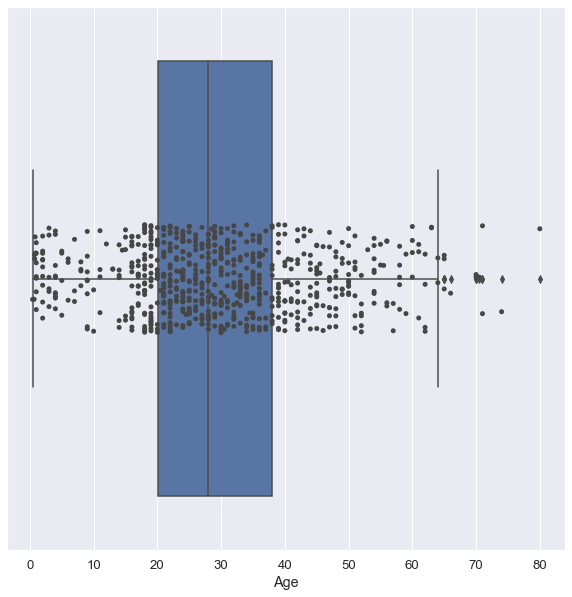

In [11]:
#getting outliers ..here are some outliers 
sns.boxplot(x='Age', data=titanic_data)
sns.stripplot(x='Age', data=titanic_data, color="#474646")

In [12]:
#there are outliers in Age from 64 to 80 

Correlation between Columns 

In [13]:
#Getting the correlation
mycols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']
my_df = titanic_data[mycols]

<AxesSubplot:>

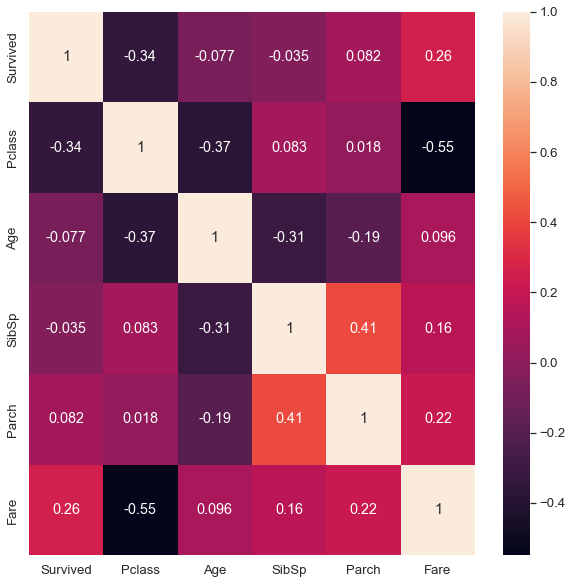

In [14]:
sns.heatmap(my_df.corr(),annot=True)

In [15]:
#Pclass & Fare : Have good Correlations
#Pclass & Survived : Maybe people who were high class was in a better place in the ship
#Pclass & Age : Have good Correlations
#Parch & Siblings Are not important

Visualization 

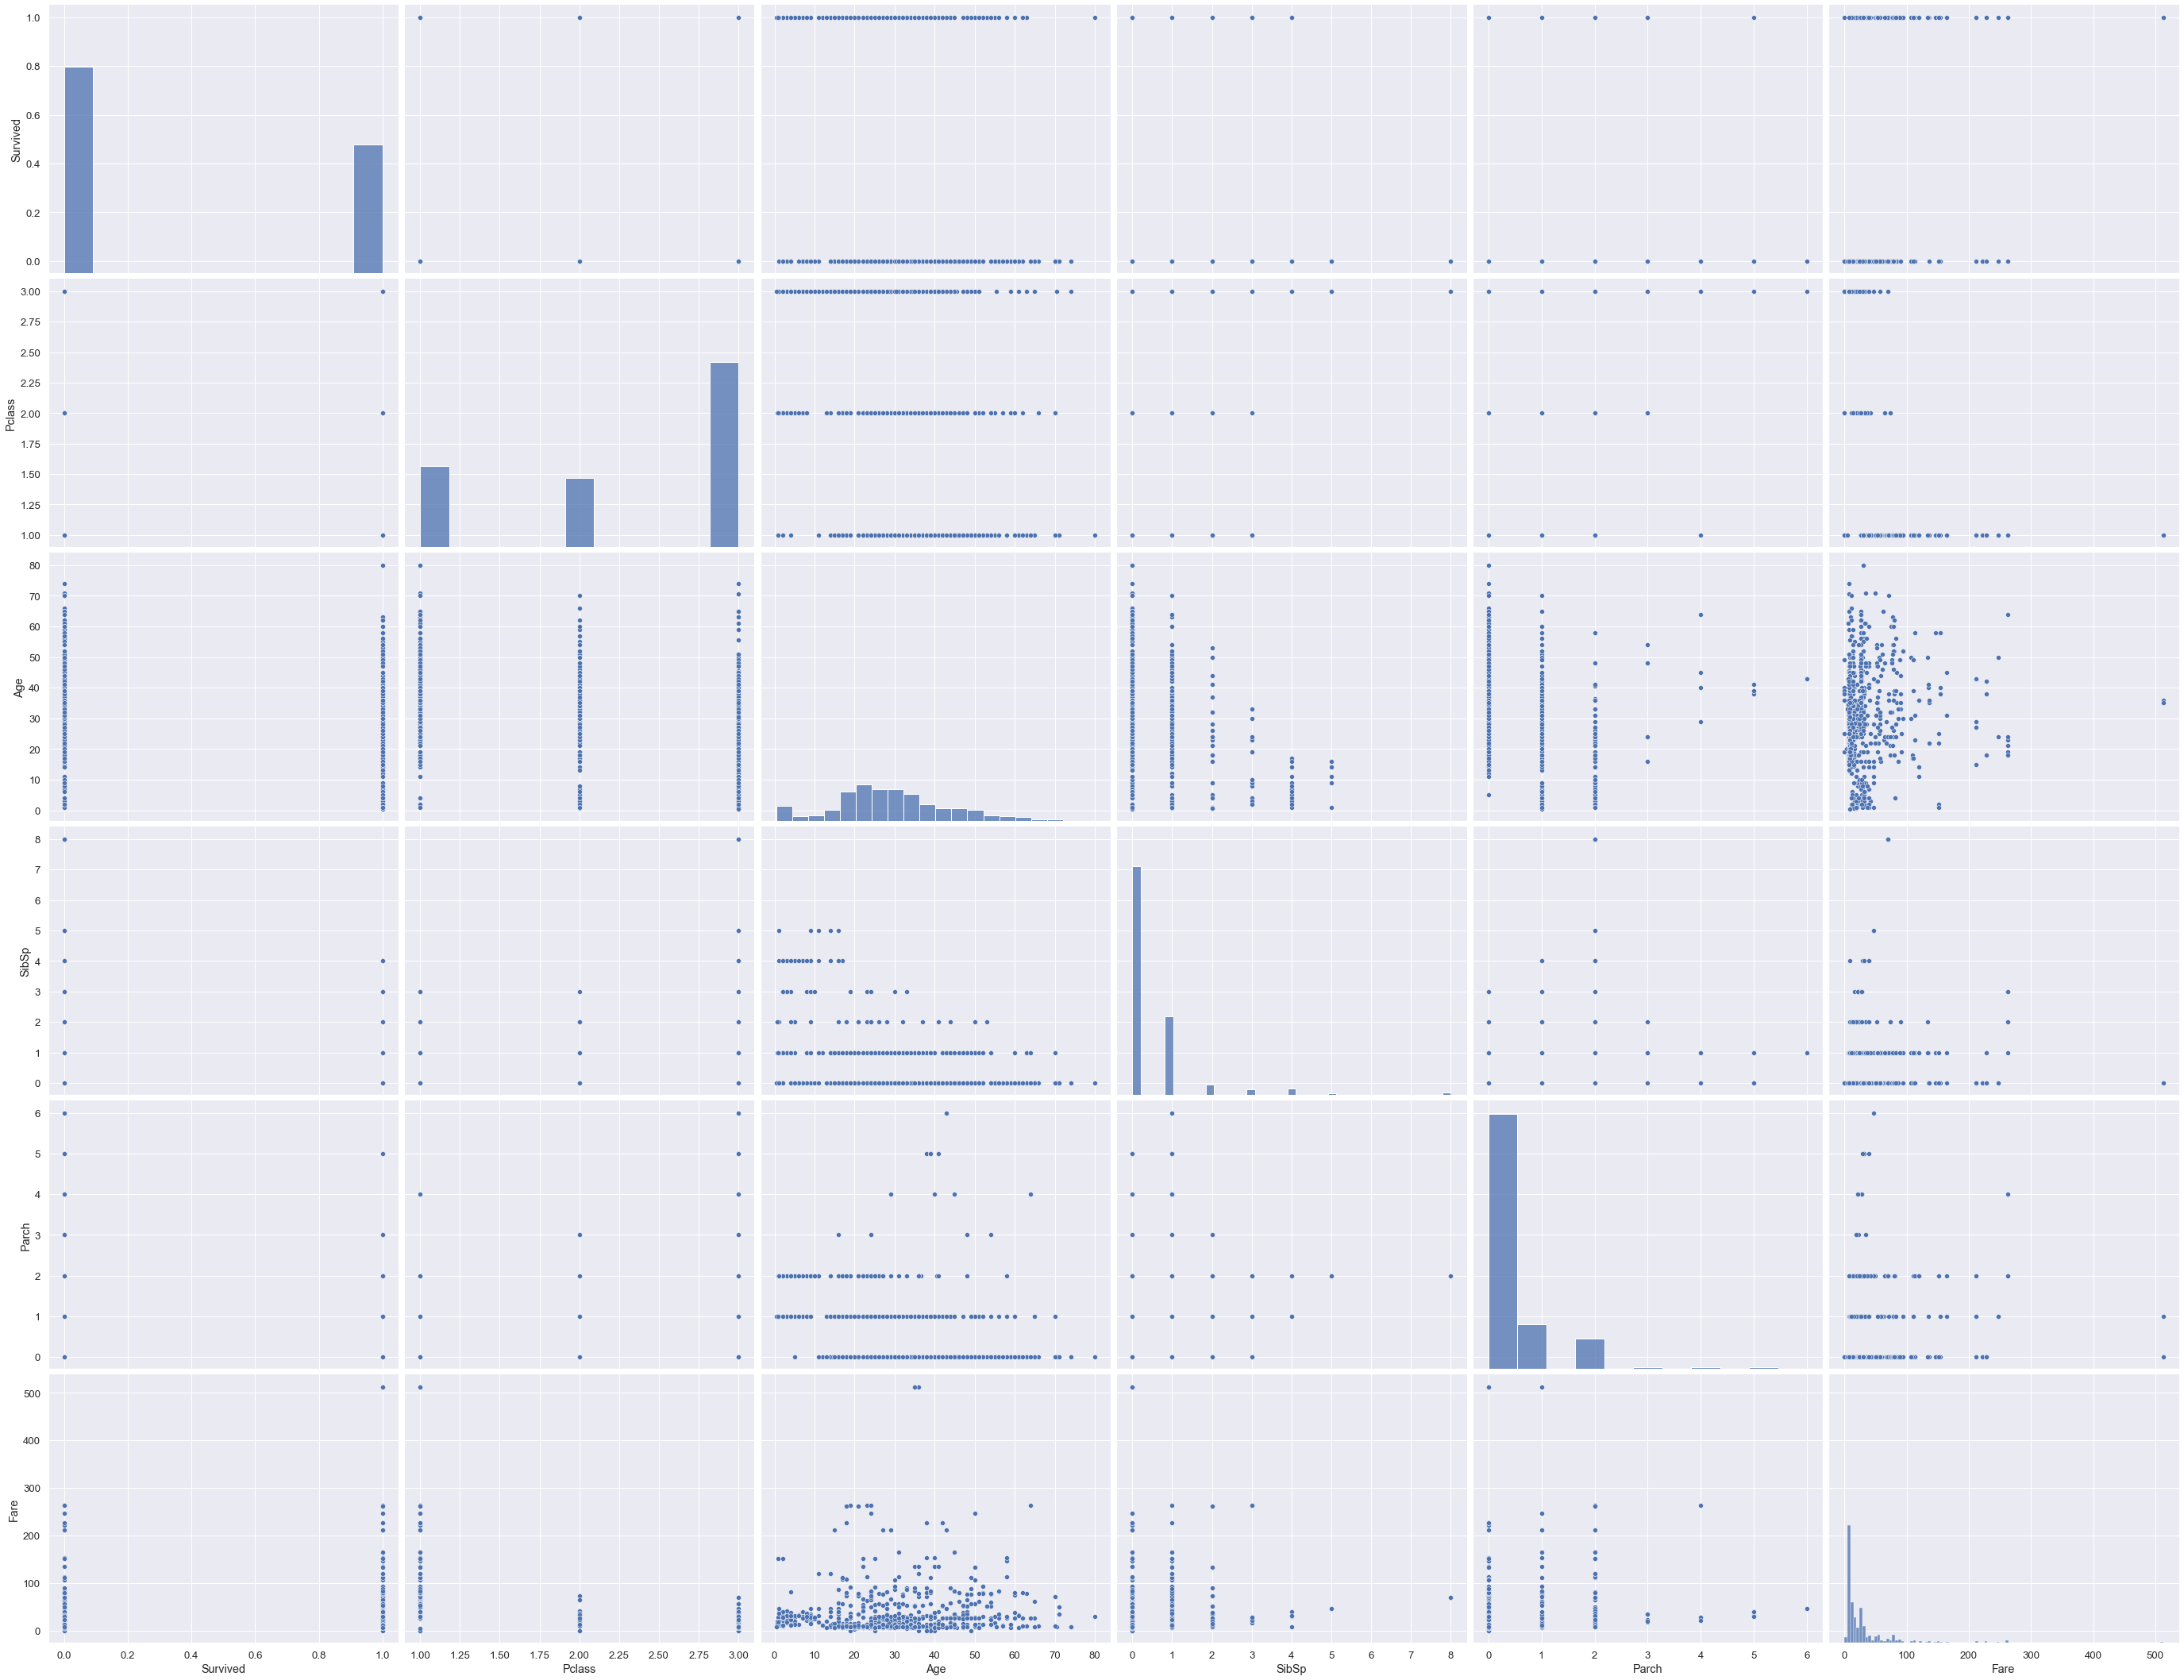

In [16]:
mycols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']
my_df = titanic_data[mycols] 
sns.pairplot(my_df, height=5, aspect=1.3)

<AxesSubplot:xlabel='Survived', ylabel='count'>

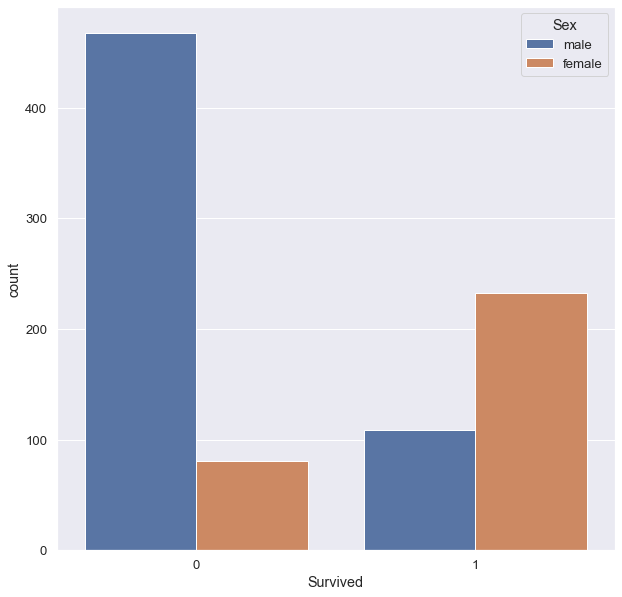

In [17]:
sns.countplot(x='Survived', hue='Sex' ,data=titanic_data)

In [18]:
#amount of died > amount of survived in the training set 
#number of survived female > survived men

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

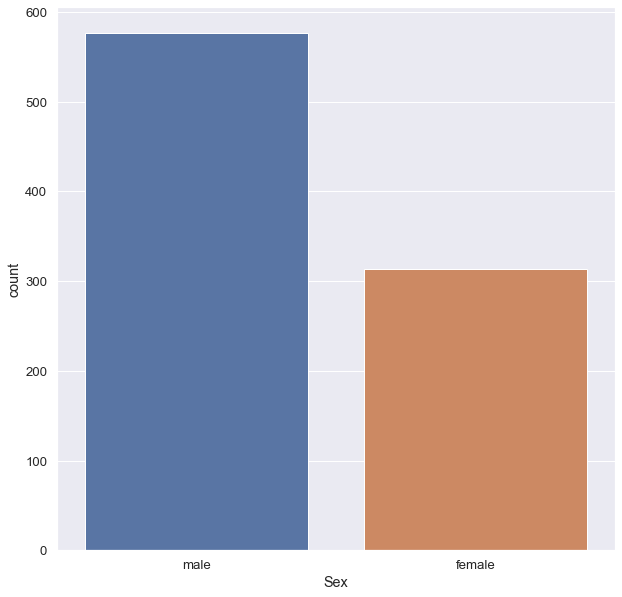

In [19]:
sns.countplot(titanic_data['Sex'])
#Amount  of male is more than Female 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

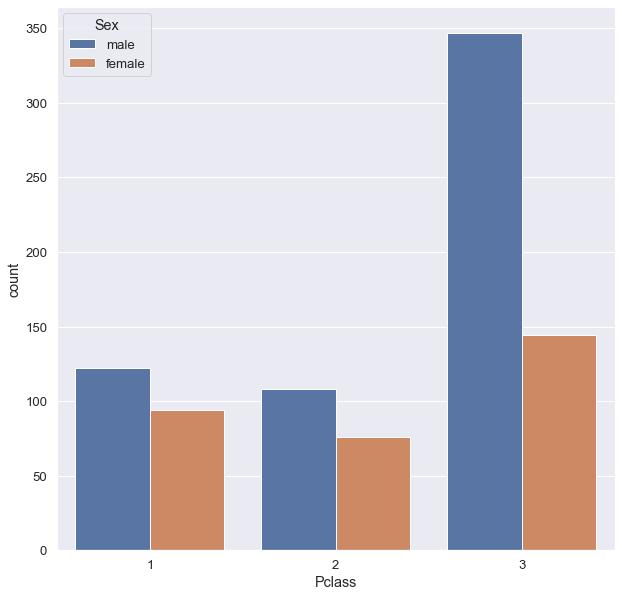

In [20]:
#See the correlation between the Pclass and sex 
sns.countplot(x='Pclass', hue='Sex' ,data=titanic_data)

In [21]:
#we notice that number of men in 3rd class > women in 3rd class 
#maybe they are the dead people because their place in the ship 
#overall , number of men > number of women

In [22]:
#now we want make sure that the name don't effect on the data 
titanic_data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [23]:
#we found in thier names (Mr, Miss, Mrs, others)


In [24]:
#replace Name by Rank & count them 
#all_data.drop('Name',axis=1,inplace=True)
def extract_title(name):
    title= name.split(',')[1].split('.')[0]
    
    if (title.strip() == "Mr") :
        return 0 
    if (title.strip() == "Mrs") : 
        return 1 
    if (title.strip() == "Miss") :
        return 2
    else :
        return 3 #none of the above  
    
titanic_data['Rank'] =  titanic_data['Name'].apply(extract_title)

In [25]:
titanic_data['Rank'] = pd.to_numeric(titanic_data['Rank'])

In [26]:
# 0 for Mr 
#1 for Mrs 
#2 for Miss 
#3 for others (normal people)

<AxesSubplot:xlabel='Rank', ylabel='count'>

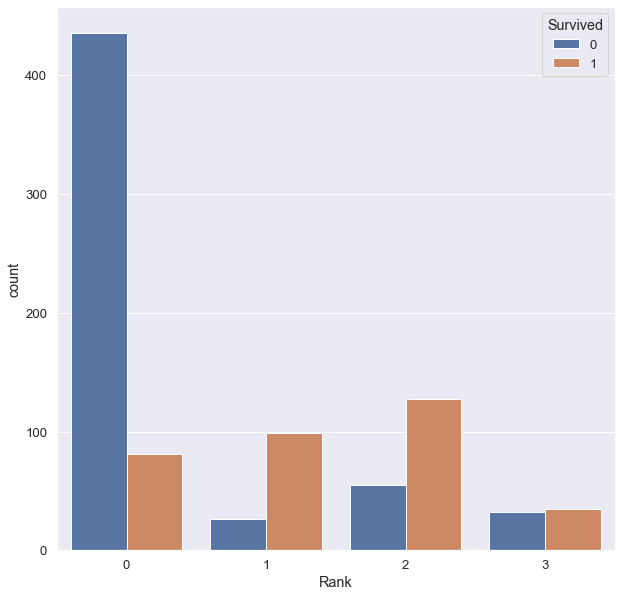

In [27]:
sns.countplot(x='Rank',hue='Survived' ,data=titanic_data)

In [28]:
#Using the Names. we can see that most of the dead people are from Mr Rank (Normal guys)
#Having a specfic title can impact with correlation 

<AxesSubplot:xlabel='Rank', ylabel='count'>

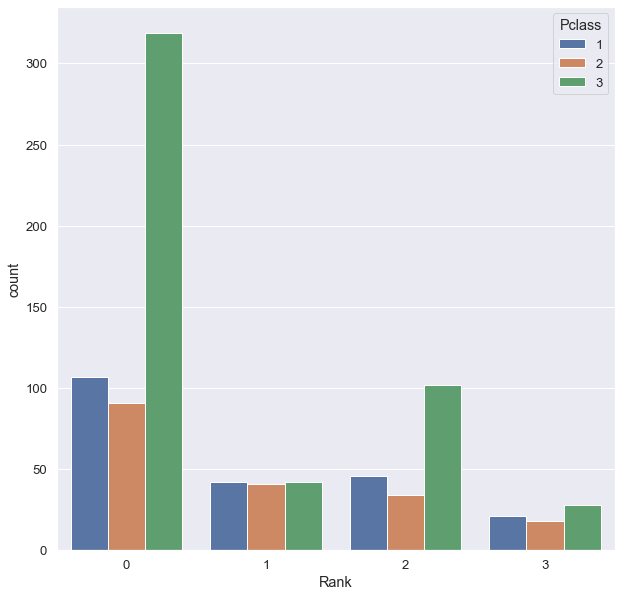

In [29]:
#now we want to see the correlation between the rank of people and the survived 
sns.countplot(x='Rank',hue='Pclass' ,data=titanic_data)

In [30]:
#Pclass=1 have the most amount of people , some of (Rank=Mr) was in the first class which is weird 
#as expected the other rank were the fewest 
#Poor women was less than poor men which is expected as well

<AxesSubplot:xlabel='Embarked', ylabel='count'>

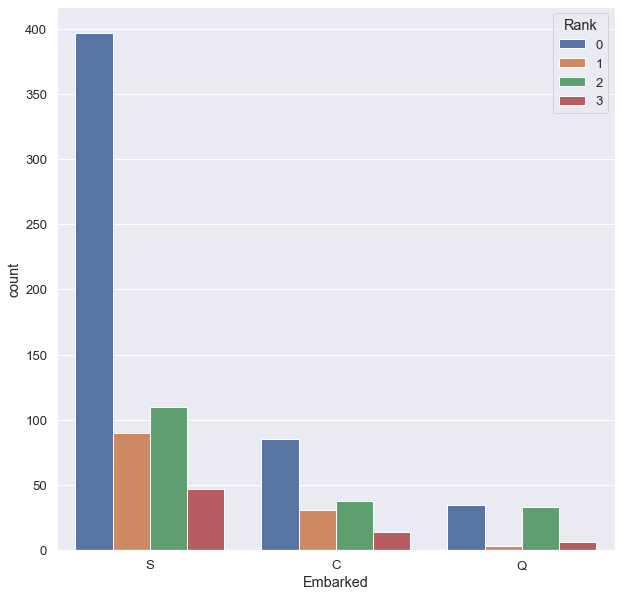

In [31]:
sns.countplot(x='Embarked', hue='Rank' ,data=titanic_data)

In [32]:
#Most normal people (Mr rank) where embarked from S 
#Most rich people embarked from S 
#we can see as well that the wealthy people is of small percentage 

In [33]:
#Make a new column (cabin group) take the first letter from cabin 
#Let's group by first letter 
def groupCabins(cabin):
    if(pd.notnull(cabin)):
        return cabin[0]
    else:
        return "U" #for Unknown 

titanic_data['CabinGroup'] = titanic_data['Cabin'].apply(groupCabins)

<AxesSubplot:xlabel='count', ylabel='CabinGroup'>

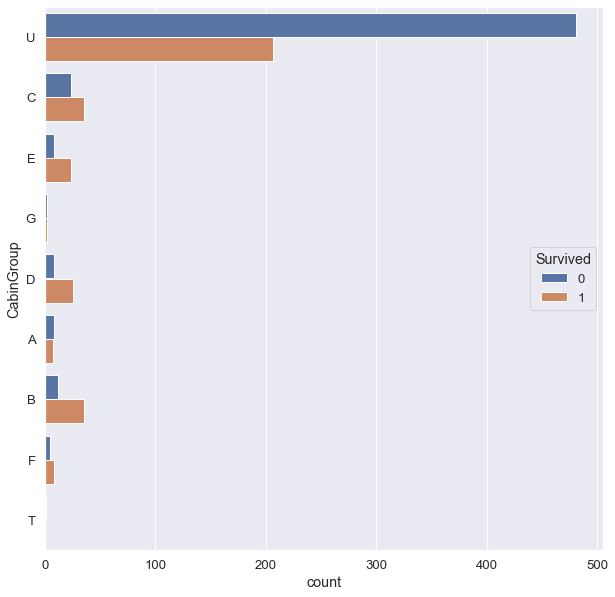

In [34]:
sns.countplot(y='CabinGroup',dodge=True,hue="Survived" ,data=titanic_data)

In [35]:
#Many people were not identified to be from which cabin (U)
#we should remove this column 

 Data Cleaning

In [36]:
#Feature engineering : 
#Create a column called Family , add sb&parch
titanic_data['Family'] = titanic_data['Parch']+titanic_data['SibSp']

In [37]:
#Convert Sex into 0,1 
titanic_data['Sex'] = titanic_data['Sex'].replace(['male','female'],[0,1])

In [38]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Rank,CabinGroup,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,U,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,U,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,C,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,U,0


In [39]:
#Remove unNeeded columns 
#Cabin => Replaced by cabinGroup or deck..
#Name =>Replaced by Rank
#Ticket => no need 
#Fare => No need (maybe further explored if i get low accuracy )
#SibSP =>Replaced by Family
#Parch => Replaced by Family 
#PassengerId => No need for now 
titanic_data.drop('Name',axis=1,inplace=True)
titanic_data.drop('Cabin',axis=1,inplace=True)
titanic_data.drop('Ticket',axis=1,inplace=True)
titanic_data.drop('Parch',axis=1,inplace=True)
titanic_data.drop('SibSp',axis=1,inplace=True)
titanic_data.drop('Fare',axis=1,inplace=True)
titanic_data.drop('PassengerId',axis=1,inplace=True)


In [40]:
#fill missing data with mean for age and mode for embraked 
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') 
titanic_data['Age'] = imputer.fit_transform(titanic_data[['Age']])

#fill the 2 missing values of Embarked with most frequent 
imputer = SimpleImputer(strategy='most_frequent') 
titanic_data['Embarked'] = imputer.fit_transform(titanic_data[['Embarked']])

In [41]:
titanic_data.isnull().sum() #make sure that no missing values

Survived      0
Pclass        0
Sex           0
Age           0
Embarked      0
Rank          0
CabinGroup    0
Family        0
dtype: int64

In [42]:
titanic_data.head()

,Survived,Pclass,Sex,Age,Embarked,Rank,CabinGroup,Family
0,0,3,0,22.0,S,0,U,1
1,1,1,1,38.0,C,1,C,1
2,1,3,1,26.0,S,2,U,0
3,1,1,1,35.0,S,1,C,1
4,0,3,0,35.0,S,0,U,0


In [43]:
#Using dummies 
#Get dummies for CABINGROUP,EMBARKED
titanic_data = pd.get_dummies(titanic_data, columns=['Rank','CabinGroup','Pclass','Sex','Embarked'], drop_first=True)

In [44]:
titanic_data.head()

,Survived,Age,Family,Rank_1,Rank_2,Rank_3,CabinGroup_B,CabinGroup_C,CabinGroup_D,CabinGroup_E,CabinGroup_F,CabinGroup_G,CabinGroup_T,CabinGroup_U,Pclass_2,Pclass_3,Sex_1,Embarked_Q,Embarked_S
0,0,22.0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
1,1,38.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,26.0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1
3,1,35.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
4,0,35.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


Split the data 

In [45]:
x=titanic_data.drop('Survived',axis=1) #get all features expect IFT
y = titanic_data['Survived']  # get only IFT 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=1) #splitting data into 80/20

Test the Models 

In [46]:
#RandomForestClassifier Model 
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [47]:
model.score(x_train, y_train)

0.9737827715355806

In [48]:
# 97.3% accuracy on training data 

In [49]:
model.score(x_test, y_test)  

0.782051282051282

In [50]:
# 79% accuracy on test data 

In [51]:
import xgboost as xgb
from xgboost import XGBClassifier

In [60]:
#XGBClassifier Model 
model = XGBClassifier(n_estimators=200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [62]:
classfiers=["RandomForestClassifier","LogisticRegression","SVC"]
models=[RandomForestClassifier(n_estimators=200),LogisticRegression(),SVC()]
res = {classfiers[i]: models[i] for i in range(len(models))} 

import csv
with open('accuracyTable.csv', mode='w') as accuracy_file:
    accuracy_writer = csv.writer(accuracy_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    accuracy_writer.writerow(["Classfier","Score"])
    for record in res :
        model=res.get(record)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy_writer.writerow([record,model.score(x_test, y_test)])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
myAccuracy = pd.read_csv('accuracyTable.csv')
myAccuracy.head(5)

,Classfier,Score
0,RandomForestClassifier,0.785256
1,LogisticRegression,0.822115
2,SVC,0.596154
